In [97]:
import re
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
list_of_words = []

with open("big.txt", 'r') as f:
    s = str(f.read())
    #print s[15000:25000]
    #print "____________________________________________________________________"
    s = re.sub(r'[^\w\s]','',s)
    #print s[15000:25000]
    s = re.sub(r'[0-9_]','',s)
    s = re.sub('[\n\t]', ' ', s)
    s = re.sub(' +', ' ', s)
    s = s.lower()
    list_of_words = s.split(' ')

print len(list_of_words)

#tutaj jakoś inaczej mi te słowa wychodzą, próbowałem zmieniać, ale tylko się oddalałem od 131810

129967


<function matplotlib.pyplot.show>

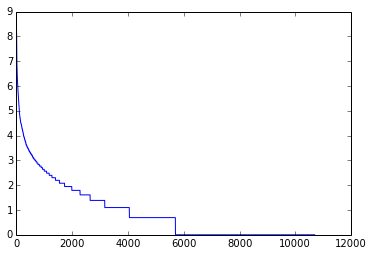

In [99]:
COUNTS = Counter(list_of_words)
#print COUNTS

x = range(len(COUNTS))
y = [np.log(v) for v in sorted(COUNTS.values())[::-1]]
plt.plot(x, y)
plt.show

In [100]:
def edits0(s):
    return {s}

In [101]:
print edits0("ss")
assert edits0('cat') == {'cat'}

set(['ss'])


In [102]:
def edits1(s):
    res = set()
    for l, c in itertools.product(xrange(len(s) + 1), xrange(ord('a'), ord('z') + 1)):
        if l != len(s): res.add(s[:l] + chr(c) + s[l + 1:]);
        if l != 0 and l != len(s): res.add(s[:(l-1)] + s[l] + s[l-1] + s[l+1:]);
        for x in zip([1, 0], ["", chr(c)]): res.add(s[:l] + x[1] + s[(x[0] + l):])
    return res

In [103]:
ed1_Cat = set(['caqt', 'ucat', 'cdt', 'ctat', 'ciat', 'vcat', 'cvat', 'ycat', 'caht', 'cut', 'jat', 
               'caty', 'clt', 'hat', 'cyat', 'capt', 'icat', 'zcat', 'fat', 'dat', 'cet', 
               'caot', 'catz', 'hcat', 'bat', 'crt', 'cayt', 'cakt', 'clat', 'cmt', 'cvt', 
               'ceat', 'cwat', 'cjat', 'cnat', 'acat', 'cft', 'cabt', 'cnt', 'cajt', 'aat', 
               'cwt', 'cast', 'czat', 'csat', 'cqat', 'cit', 'cart', 'jcat', 'cfat', 'cazt', 
               'pcat', 'catd', 'caat', 'cgt', 'ctt', 'cati', 'cait', 'cot', 'cawt', 'xcat', 
               'cta', 'act', 'ncat', 'cxt', 'ckat', 'calt', 'ca', 'dcat', 'cadt', 'zat', 
               'cato', 'ct', 'crat', 'cata', 'catb', 'catc', 'tcat', 'cate', 'catf', 'catg', 
               'cath', 'yat', 'catj', 'catk', 'xat', 'catm', 'catn', 'catl', 'catp', 'ocat', 
               'catr', 'cats', 'cht', 'catu', 'catv', 'catw', 'catx', 'iat', 'bcat', 'wat', 
               'catq', 'vat', 'cqt', 'cact', 'cyt', 'rcat', 'gat', 'cant', 'cgat', 'mcat', 
               'eat', 'kcat', 'caz', 'cay', 'cax', 'cas', 'car', 'caq', 'cap', 'caw', 'cav', 
               'cau', 'cat', 'cak', 'caj', 'cai', 'cah', 'cao', 'can', 'cam', 'cal', 'cac', 
               'cab', 'caa', 'cag', 'caf', 'cae', 'cad', 'tat', 'chat', 'fcat', 'caft', 'lcat', 
               'uat', 'czt', 'rat', 'at', 'cbt', 'catt', 'scat', 'sat', 'qat', 'qcat', 'pat', 
               'wcat', 'cuat', 'oat', 'nat', 'cst', 'cavt', 'cjt', 'mat', 'cxat', 'caet', 'cmat', 
               'ccat', 'cagt', 'cpat', 'kat', 'lat', 'gcat', 'caxt', 'cdat', 'coat', 'cct', 'camt', 
               'ckt', 'caut', 'cpt', 'cbat', 'ecat']) 

assert edits1('cat') == ed1_Cat

In [104]:
def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [105]:
def candidates(s):
    if COUNTS[s] > 0:
        return edits0(s)
    l = [x for x in edits1(s) if COUNTS[x] > 0]
    if l == []:
        l = [x for x in edits2(s) if COUNTS[x] > 0]
    if(l == []):
        return edits0(s)
    return set(l)

In [110]:
candidates("pupa")

{'cuba',
 'cup',
 'pa',
 'pipe',
 'pips',
 'plea',
 'pp',
 'pull',
 'pulp',
 'puny',
 'pupil',
 'pure',
 'push',
 'put',
 'up',
 'usa'}

In [107]:
def correct(s):
    cs = candidates(s)
    ile = max(COUNTS[a] for a in cs)
    for c in cs:
        if COUNTS[c] == ile:
            return c

In [108]:
assert correct('economtric') == 'economic'
assert correct('zcat') == 'cat'
assert correct('cmoing') == 'coming'
assert correct("thay") == "that", "That is more probable than they"

In [109]:
def correct_text(text):
    "Correct all the words within a text, returning the corrected text."
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Spell-correct word in match, and preserve proper upper/lower/title case."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Return the case-function appropriate for text: upper, lower, title, or just str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

assert correct_text('Speling Errurs IN somethink. Whutever; unusuel misteakes?') == 'Seeing Errors IN something. Whatever; unusual mistaken?'